In [27]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math

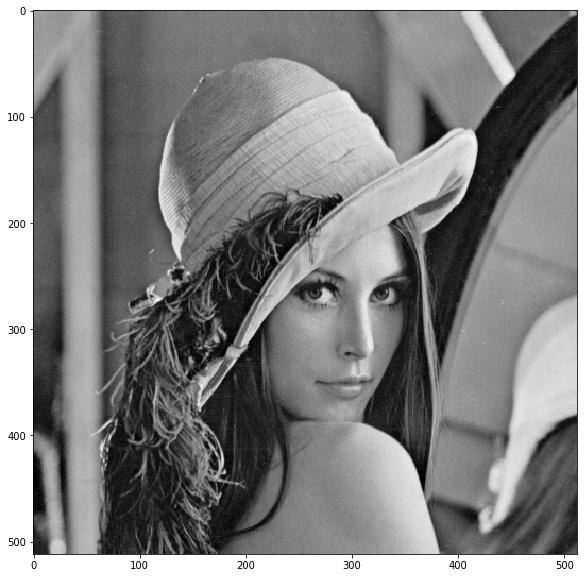

In [2]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
plt.figure(figsize = (10,10))
plt.imshow(Y, cmap="gray")

In [107]:
contexts = [dict() for x in range(256)]
linear_array = Y.ravel()
linear_array = np.append(linear_array, [0])
context = linear_array[0]
for y in range(512):
    for x in range(512):
        next = linear_array[y*512+x+1]
        if next in contexts[context]:
            contexts[context][next] += 1
        else:
            contexts[context][next] = 1
        context = next

In [108]:
for i in enumerate(contexts):
    print(i)

(0, {})
(1, {})
(2, {})
(3, {})
(4, {})
(5, {})
(6, {})
(7, {})
(8, {})
(9, {})
(10, {})
(11, {})
(12, {})
(13, {})
(14, {})
(15, {})
(16, {})
(17, {})
(18, {})
(19, {})
(20, {})
(21, {})
(22, {})
(23, {})
(24, {})
(25, {30: 1})
(26, {28: 4, 25: 1, 27: 1, 30: 1})
(27, {29: 3, 32: 1, 31: 3, 33: 2, 26: 2, 27: 4, 28: 5, 30: 2})
(28, {30: 7, 35: 2, 32: 4, 49: 1, 29: 2, 31: 5, 59: 1, 34: 2, 38: 1, 36: 1, 46: 1, 41: 1})
(29, {172: 1, 34: 8, 32: 6, 35: 5, 30: 6, 37: 5, 29: 7, 31: 5, 39: 4, 47: 1, 36: 3, 44: 1, 27: 3, 28: 1, 98: 1, 33: 5, 40: 1})
(30, {30: 10, 168: 1, 31: 12, 33: 7, 35: 10, 34: 8, 32: 14, 37: 6, 36: 6, 29: 7, 38: 2, 27: 1, 42: 1, 28: 3, 50: 1, 53: 1, 39: 2, 44: 1})
(31, {28: 5, 39: 7, 37: 8, 35: 10, 31: 18, 38: 10, 34: 10, 36: 11, 33: 14, 30: 5, 71: 1, 46: 1, 32: 9, 29: 6, 50: 1, 42: 2, 57: 2, 41: 3, 44: 1, 47: 1, 27: 2, 55: 1, 43: 3, 40: 2, 45: 1, 59: 1})
(32, {170: 1, 27: 5, 26: 1, 32: 9, 30: 11, 36: 17, 38: 15, 40: 4, 33: 12, 35: 17, 31: 10, 37: 10, 45: 2, 28: 2, 42: 7, 29:

In [109]:
totals = np.zeros(256, np.uint32)
for i in enumerate(contexts):
    for j in i[1]:
        totals[i[0]] += i[1].get(j)

In [110]:
totals

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,    7,   22,   28,   63,   93,  135,  177,
        224,  305,  420,  508,  606,  780,  922, 1080, 1280, 1428, 1643,
       1757, 1845, 2038, 2067, 2006, 2078, 2053, 2043, 1965, 1845, 1746,
       1672, 1550, 1476, 1290, 1250, 1193, 1022,  963,  946,  911,  866,
        788,  800,  773,  773,  849,  812,  820,  803,  879,  902,  852,
        887,  940,  934,  916,  925,  847,  949,  938,  961,  997, 1015,
       1071, 1106, 1127, 1223, 1194, 1346, 1414, 1558, 1626, 1792, 1853,
       2106, 1929, 1897, 1943, 1840, 1764, 1737, 1587, 1498, 1463, 1340,
       1368, 1388, 1362, 1444, 1377, 1340, 1407, 1462, 1548, 1515, 1623,
       1790, 1793, 1877, 2056, 2099, 2308, 2304, 2380, 2489, 2389, 2265,
       2238, 2113, 1990, 1863, 1926, 1886, 2042, 2123, 2275, 2267, 2342,
       2437, 2462, 2410, 2219, 2335, 2286, 2197, 23

In [111]:
def entropy(data, total):
    for x in data:
        data[x] /= 1.*total
    en = 0.
    for x in data:
        en += data[x] * math.log(data[x])/math.log(2.0)
    return -en

In [112]:
entropies = np.empty(256)
for i in enumerate(contexts):
    entropies[i[0]] = entropy(contexts[i[0]], totals[i[0]])

In [113]:
entropies

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  1.66449778,  2.86309455,  3.19088617,  3.77697244,
        3.68068045,  4.15464634,  4.42546464,  4.45209087,  4.40208849,
        4.52749948,  4.5957752 ,  4.61663569,  4.71265972,  4.5712296 ,
        4.73842498,  4.67493804,  4.71980645,  4.72435506,  4.74836582,
        4.78216706,  4.83970226,  4.87749787,  4.85375565,  4.926816  ,
        4.97783211,  5.06917499,  5.09919761,  5.12399759,  5.15241682,
        5.14670319,  5.23326882,  5.37421384,  5.43344803,  5.47118917,
        5.58324311,  5.64943394,  5.68405322,  5.68024565,  5.8057569 ,
        5.76604837,  5.74925101,  5.72526219,  5.7942263 ,  5.83

In [114]:
np.average(entropies)

3.8924125688911806

In [115]:
count = np.zeros(256)
for i in linear_array:
    count[i] += 1

In [116]:
count

array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 7.000e+00, 2.200e+01, 2.800e+01, 6.300e+01,
       9.300e+01, 1.350e+02, 1.770e+02, 2.240e+02, 3.050e+02, 4.200e+02,
       5.080e+02, 6.060e+02, 7.800e+02, 9.220e+02, 1.080e+03, 1.280e+03,
       1.428e+03, 1.643e+03, 1.757e+03, 1.845e+03, 2.038e+03, 2.067e+03,
       2.006e+03, 2.078e+03, 2.053e+03, 2.043e+03, 1.965e+03, 1.845e+03,
       1.746e+03, 1.672e+03, 1.550e+03, 1.476e+03, 1.290e+03, 1.250e+03,
       1.193e+03, 1.022e+03, 9.630e+02, 9.460e+02, 9.110e+02, 8.660e+02,
       7.880e+02, 8.000e+02, 7.730e+02, 7.730e+02, 8.490e+02, 8.120e+02,
       8.200e+02, 8.030e+02, 8.790e+02, 9.020e+02, 8.520e+02, 8.870e+02,
       9.400e+02, 9.340e+02, 9.160e+02, 9.250e+02, 

In [117]:
count /= (512*512)
count

array([3.81469727e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.81469727e-06, 2.67028809e-05, 8.39233398e-05,
       1.06811523e-04, 2.40325928e-04, 3.54766846e-04, 5.14984131e-04,
       6.75201416e-04, 8.54492188e-04, 1.16348267e-03, 1.60217285e-03,
       1.93786621e-03, 2.31170654e-03, 2.97546387e-03, 3.51715088e-03,
       4.11987305e-03, 4.88281250e-03, 5.44738770e-03, 6.26754761e-03,
       6.70242310e-03, 7.03811646e-03, 7.77435303e-03, 7.88497925e-03,
       7.65228271e-03, 7.92694092e-03, 7.83157349e-03, 7.79342651e-03,
       7.49588013e-03, 7.03811646e-03, 6.66046143e-03, 6.37817383e-03,
      

In [119]:
en = 0.0
for i in range(256):
    if count[i] > 0:
        en += count[i] * math.log(count[i])/math.log(2.0)
-en

7.445555944314706